In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data = pd.read_csv('Grades.csv')

In [3]:
data.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [4]:
data.shape

(571, 43)

In [5]:
data.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [6]:
data.info

<bound method DataFrame.info of      Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-4

In [7]:
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [8]:
data.isnull().sum().sum()

425

In [9]:
data.columns.values

array(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107',
       'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331',
       'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442',
       'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype=object)

In [10]:
modes = data.mode().iloc[0]

data[['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107',
       'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331',
       'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442',
       'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA']] = data[['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107',
       'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331',
       'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442',
       'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA']].fillna(modes)

print(data)


     Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  

In [11]:
data.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [12]:
pd.unique(data["PH-121"])

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [13]:
pd.unique(data["HS-101"])

array(['D+', 'D', 'B', 'C+', 'A-', 'B-', 'C-', 'B+', 'C', 'A', 'A+', 'F'],
      dtype=object)

In [14]:
pd.unique(data["CS-412"])

array(['A-', 'B', 'A', 'C+', 'B+', 'C-', 'B-', 'A+', 'C', 'D+', 'F', 'W',
       'D'], dtype=object)

In [15]:
grade_encoded = {'A+': 5, 'A': 4.75, 'A-': 4.5, 'B+': 4.25, 'B': 4, 'B-': 3.75, 'C+': 3.5, 'C': 3.25, 'C-': 3, 'D+': 2.75, 'D': 2.5, 'D-': 2.25, 'F': 1, 'WU': 0, 'W': 0}


In [16]:
columns = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
grade_encoded = {'A+': 5, 'A': 4.75, 'A-': 4.5, 'B+': 4.25, 'B': 4, 'B-': 3.75, 'C+': 3.5, 'C': 3.25, 'C-': 3, 'D+': 2.75, 'D': 2.5, 'D-': 2.25, 'F': 1, 'WU': 0, 'W': 0}
data[columns] = data[columns].applymap(grade_encoded.get)
print (data.head(5))
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 'A+':4,'F':0.0,'W':0,'I':0}
    

   Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0  CS-97001    3.75    2.75    3.00       3.25    3.00    2.75    2.50   
1  CS-97002    4.75    2.50    2.75       2.50    3.75    3.25    2.50   
2  CS-97003    4.75    4.00    4.75       3.75    4.25    4.75    3.75   
3  CS-97004    2.50    3.50    2.75       2.50    2.50    4.50    2.75   
4  CS-97005    4.50    4.50    4.50       4.25    4.75    4.75    4.50   

   EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0    3.00    3.75  ...    3.00    3.00    3.00    3.00    4.50    4.75   
1    4.75    2.75  ...    2.75    2.50    3.25    2.50    4.50    3.75   
2    4.25    4.50  ...    4.00    4.00    4.75    3.25    4.75    4.75   
3    3.00    2.50  ...    2.75    3.25    2.75    3.00    3.75    4.00   
4    4.25    4.75  ...    3.75    4.25    4.25    3.75    4.50    4.75   

   CS-419  CS-423  CS-412   CGPA  
0    3.00    4.00    4.50  2.205  
1    3.25    3.25    4.00  2.008  
2    

In [17]:
data.head(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,3.75,2.75,3.00,3.25,3.00,2.75,2.50,3.00,3.75,...,3.00,3.00,3.00,3.00,4.50,4.75,3.00,4.00,4.50,2.205
1,CS-97002,4.75,2.50,2.75,2.50,3.75,3.25,2.50,4.75,2.75,...,2.75,2.50,3.25,2.50,4.50,3.75,3.25,3.25,4.00,2.008
2,CS-97003,4.75,4.00,4.75,3.75,4.25,4.75,3.75,4.25,4.50,...,4.00,4.00,4.75,3.25,4.75,4.75,4.75,4.50,4.75,3.608
3,CS-97004,2.50,3.50,2.75,2.50,2.50,4.50,2.75,3.00,2.50,...,2.75,3.25,2.75,3.00,3.75,4.00,3.50,3.50,3.50,1.906
4,CS-97005,4.50,4.50,4.50,4.25,4.75,4.75,4.50,4.25,4.75,...,3.75,4.25,4.25,3.75,4.50,4.75,4.50,4.50,4.75,3.448


In [18]:
data.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.00000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.997811,3.700088,4.190455,3.902802,3.979422,4.248687,3.951839,3.96979,4.002189,3.757881,...,3.990368,3.753940,4.101576,3.586252,4.204028,4.308669,4.011384,3.970665,4.192207,2.954888
std,0.771686,0.687708,0.755942,0.808920,0.767138,0.625218,0.676745,0.78435,0.636685,0.799632,...,0.864705,0.692603,0.655254,0.772828,0.694408,0.664956,0.569589,0.688816,0.651540,0.620552
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,2.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.800000
25%,3.500000,3.250000,3.875000,3.250000,3.500000,4.000000,3.750000,3.50000,3.500000,3.000000,...,3.250000,3.250000,3.750000,3.250000,4.000000,4.125000,3.750000,3.500000,4.000000,2.538000
50%,4.250000,3.750000,4.500000,4.000000,4.250000,4.500000,4.000000,4.25000,4.250000,3.750000,...,4.250000,3.750000,4.250000,3.750000,4.500000,4.500000,4.000000,4.250000,4.500000,3.029000
75%,4.500000,4.250000,4.750000,4.500000,4.500000,4.750000,4.500000,4.50000,4.500000,4.500000,...,4.750000,4.250000,4.750000,4.000000,4.500000,4.750000,4.500000,4.500000,4.500000,3.451000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.985000


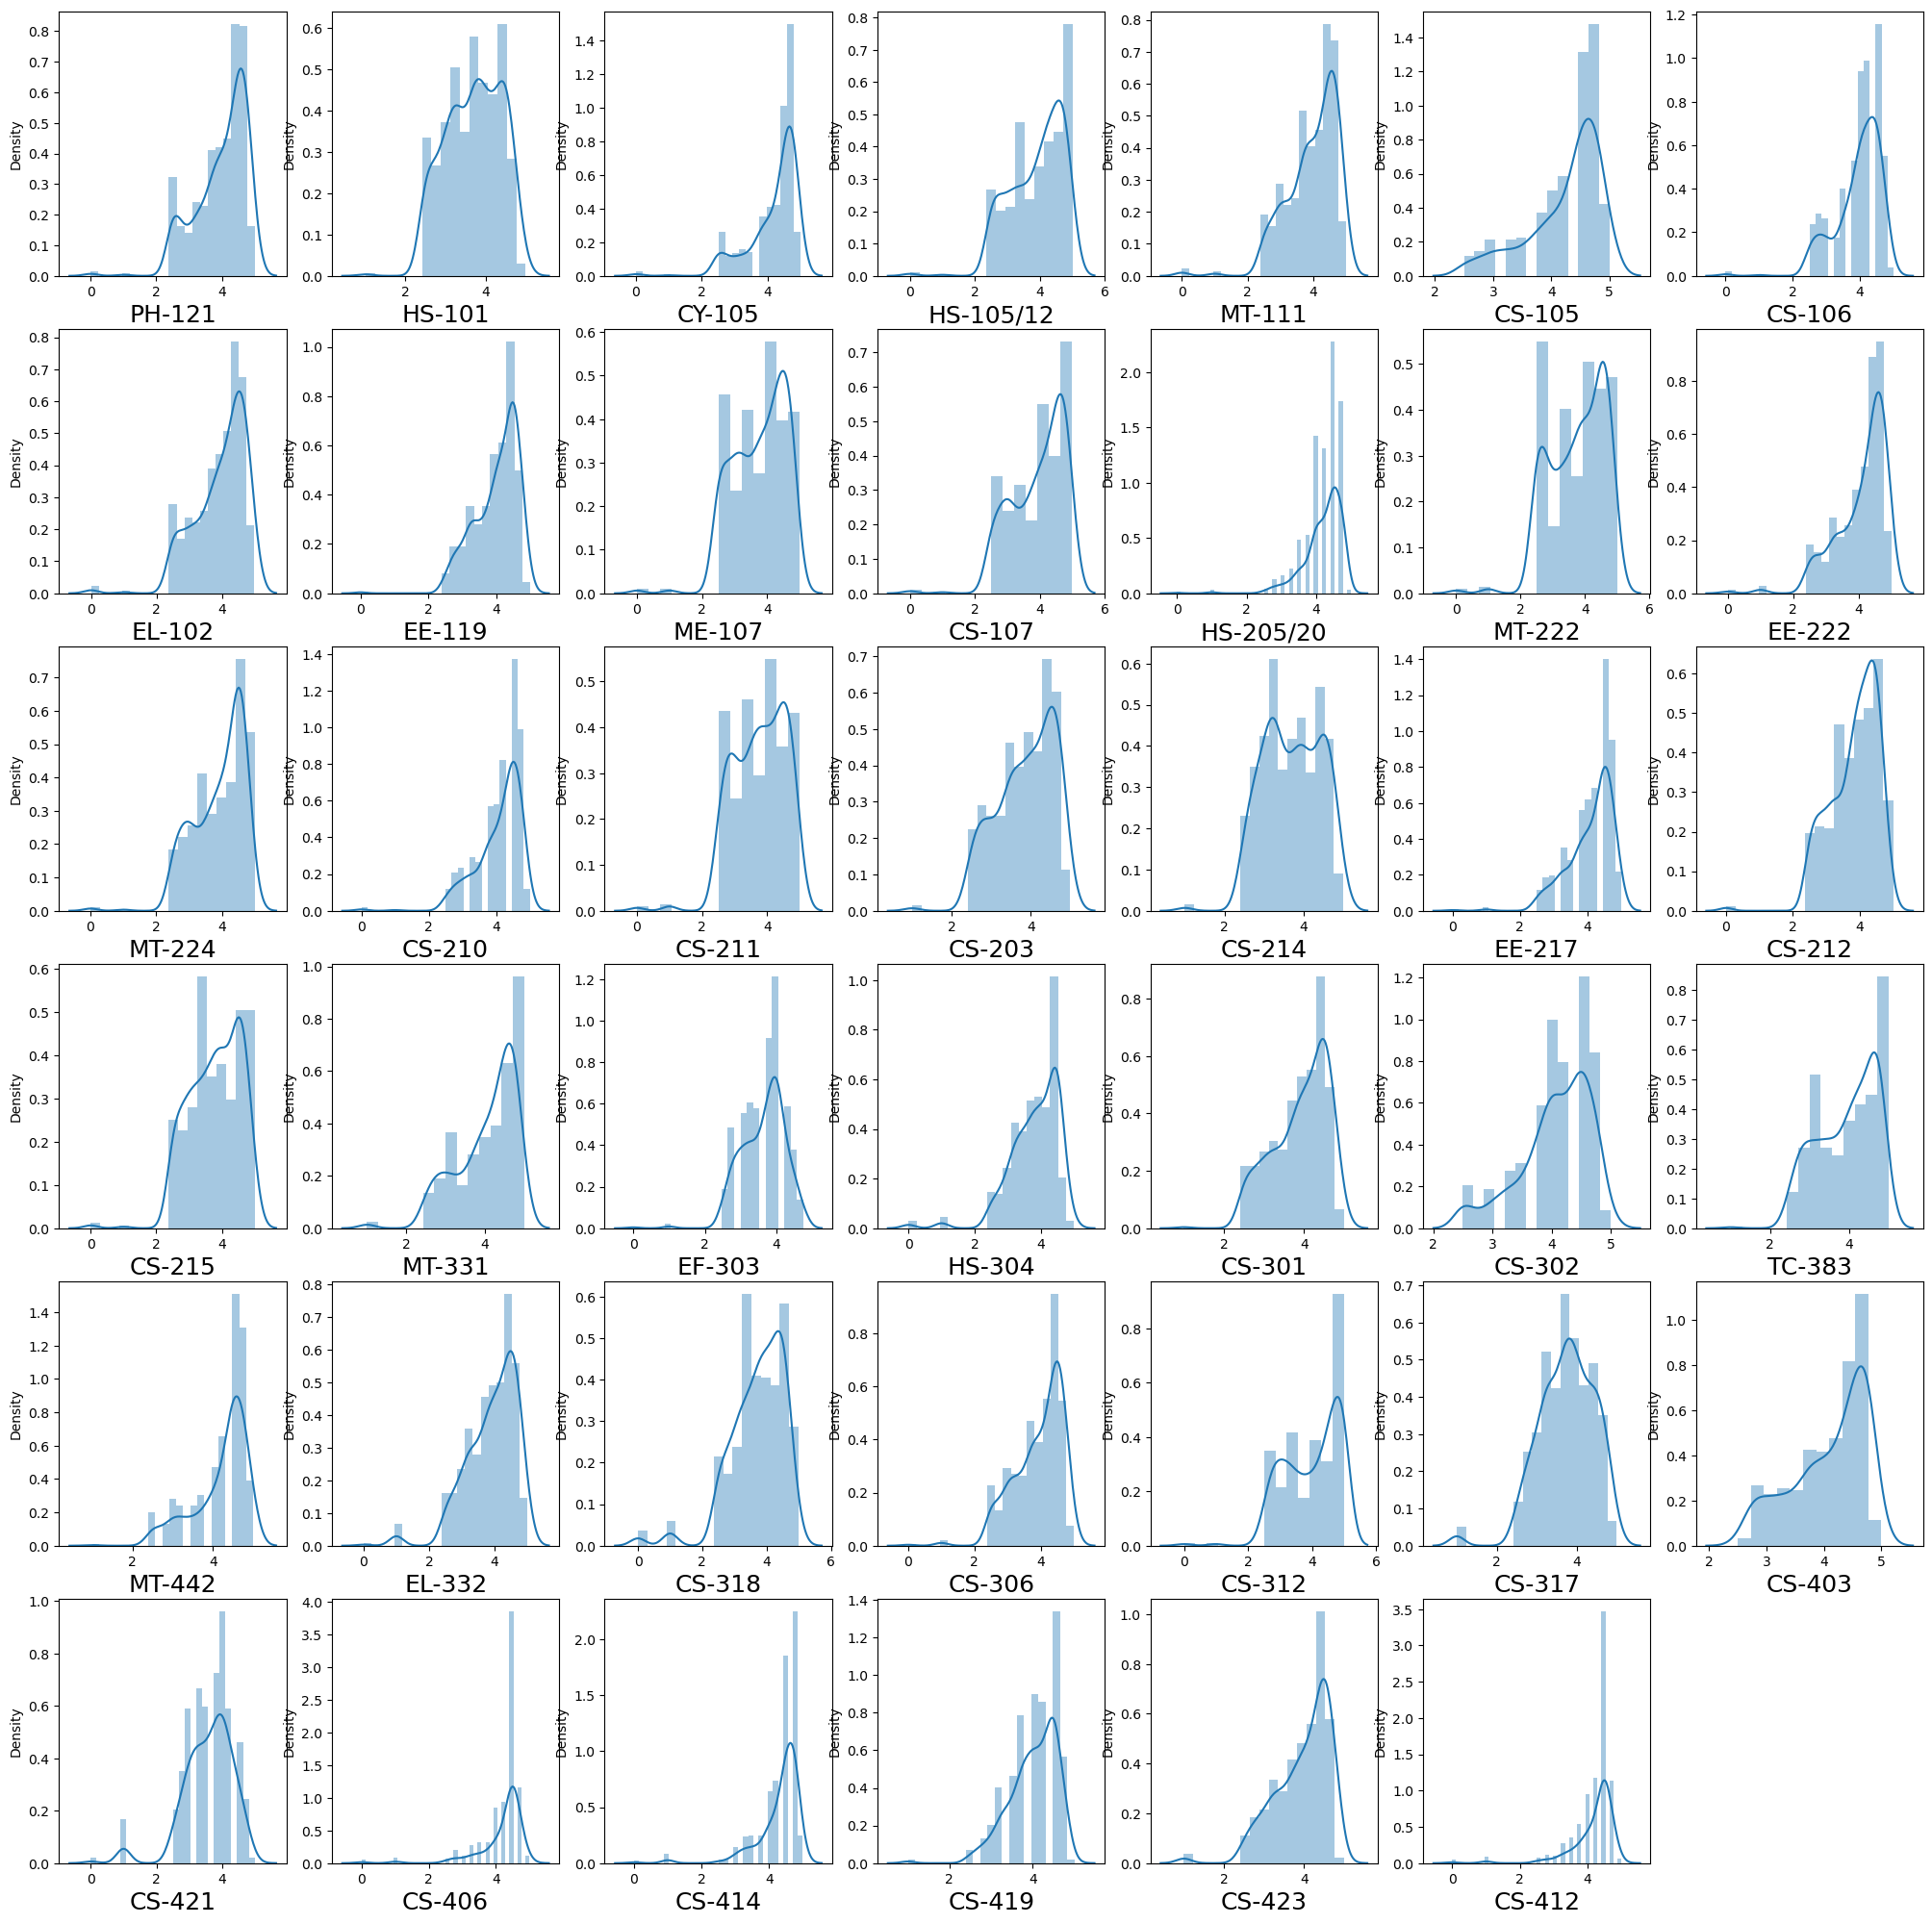

In [19]:
columns = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107',
       'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331',
       'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442',
       'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 42:
        ax = plt.subplot(6, 7, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()


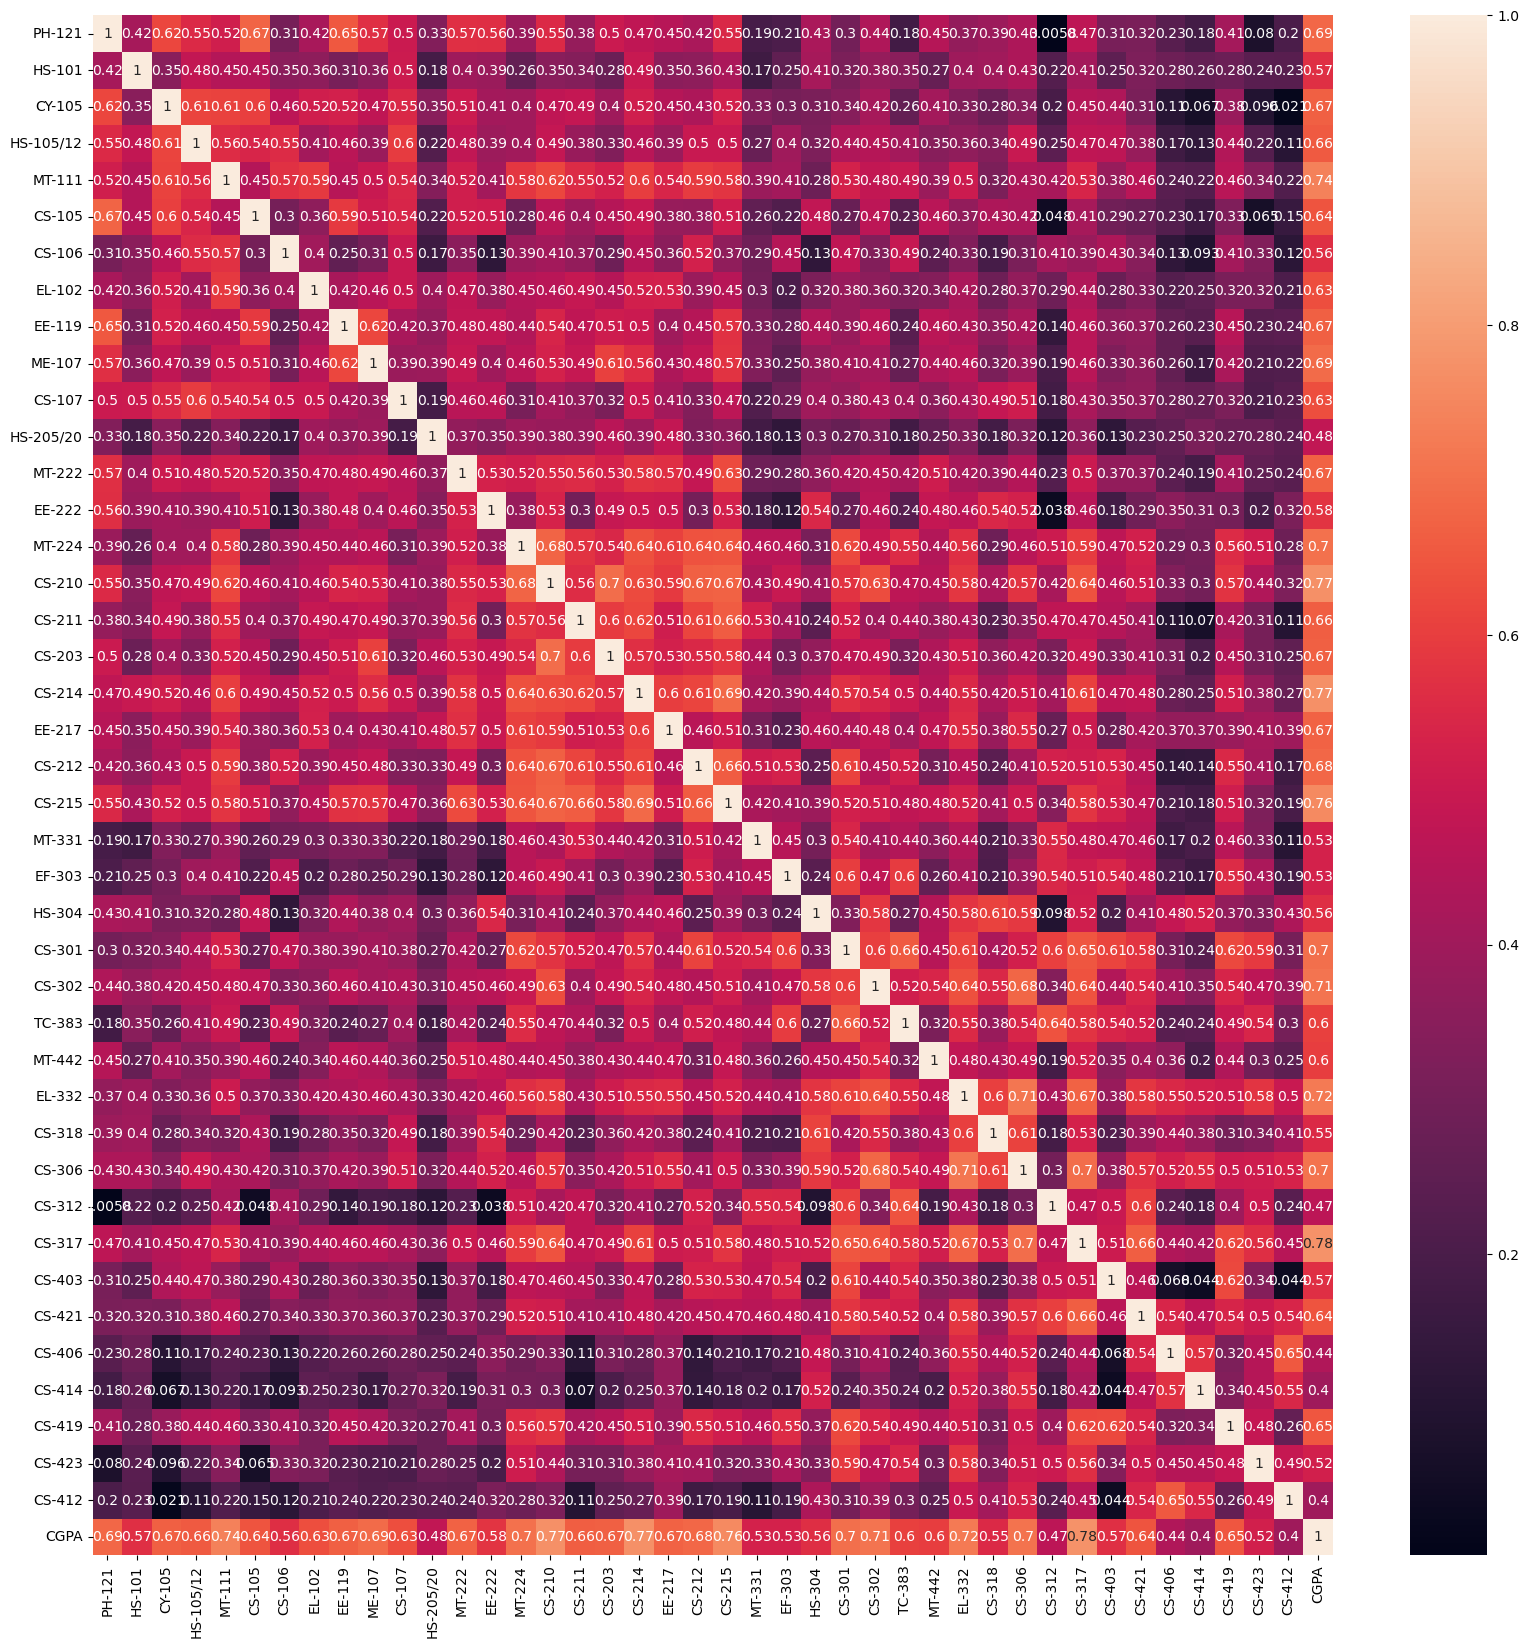

In [20]:
df_corr= data.corr().abs()
plt.figure (figsize=(20,20))
sns.heatmap(df_corr, annot=True,)
plt.show()

In [21]:
data= data.drop (columns= ['Seat No.','CS-412', 'CS-406', 'CS-419', 'CS-423', 'CS-414'], axis=1)

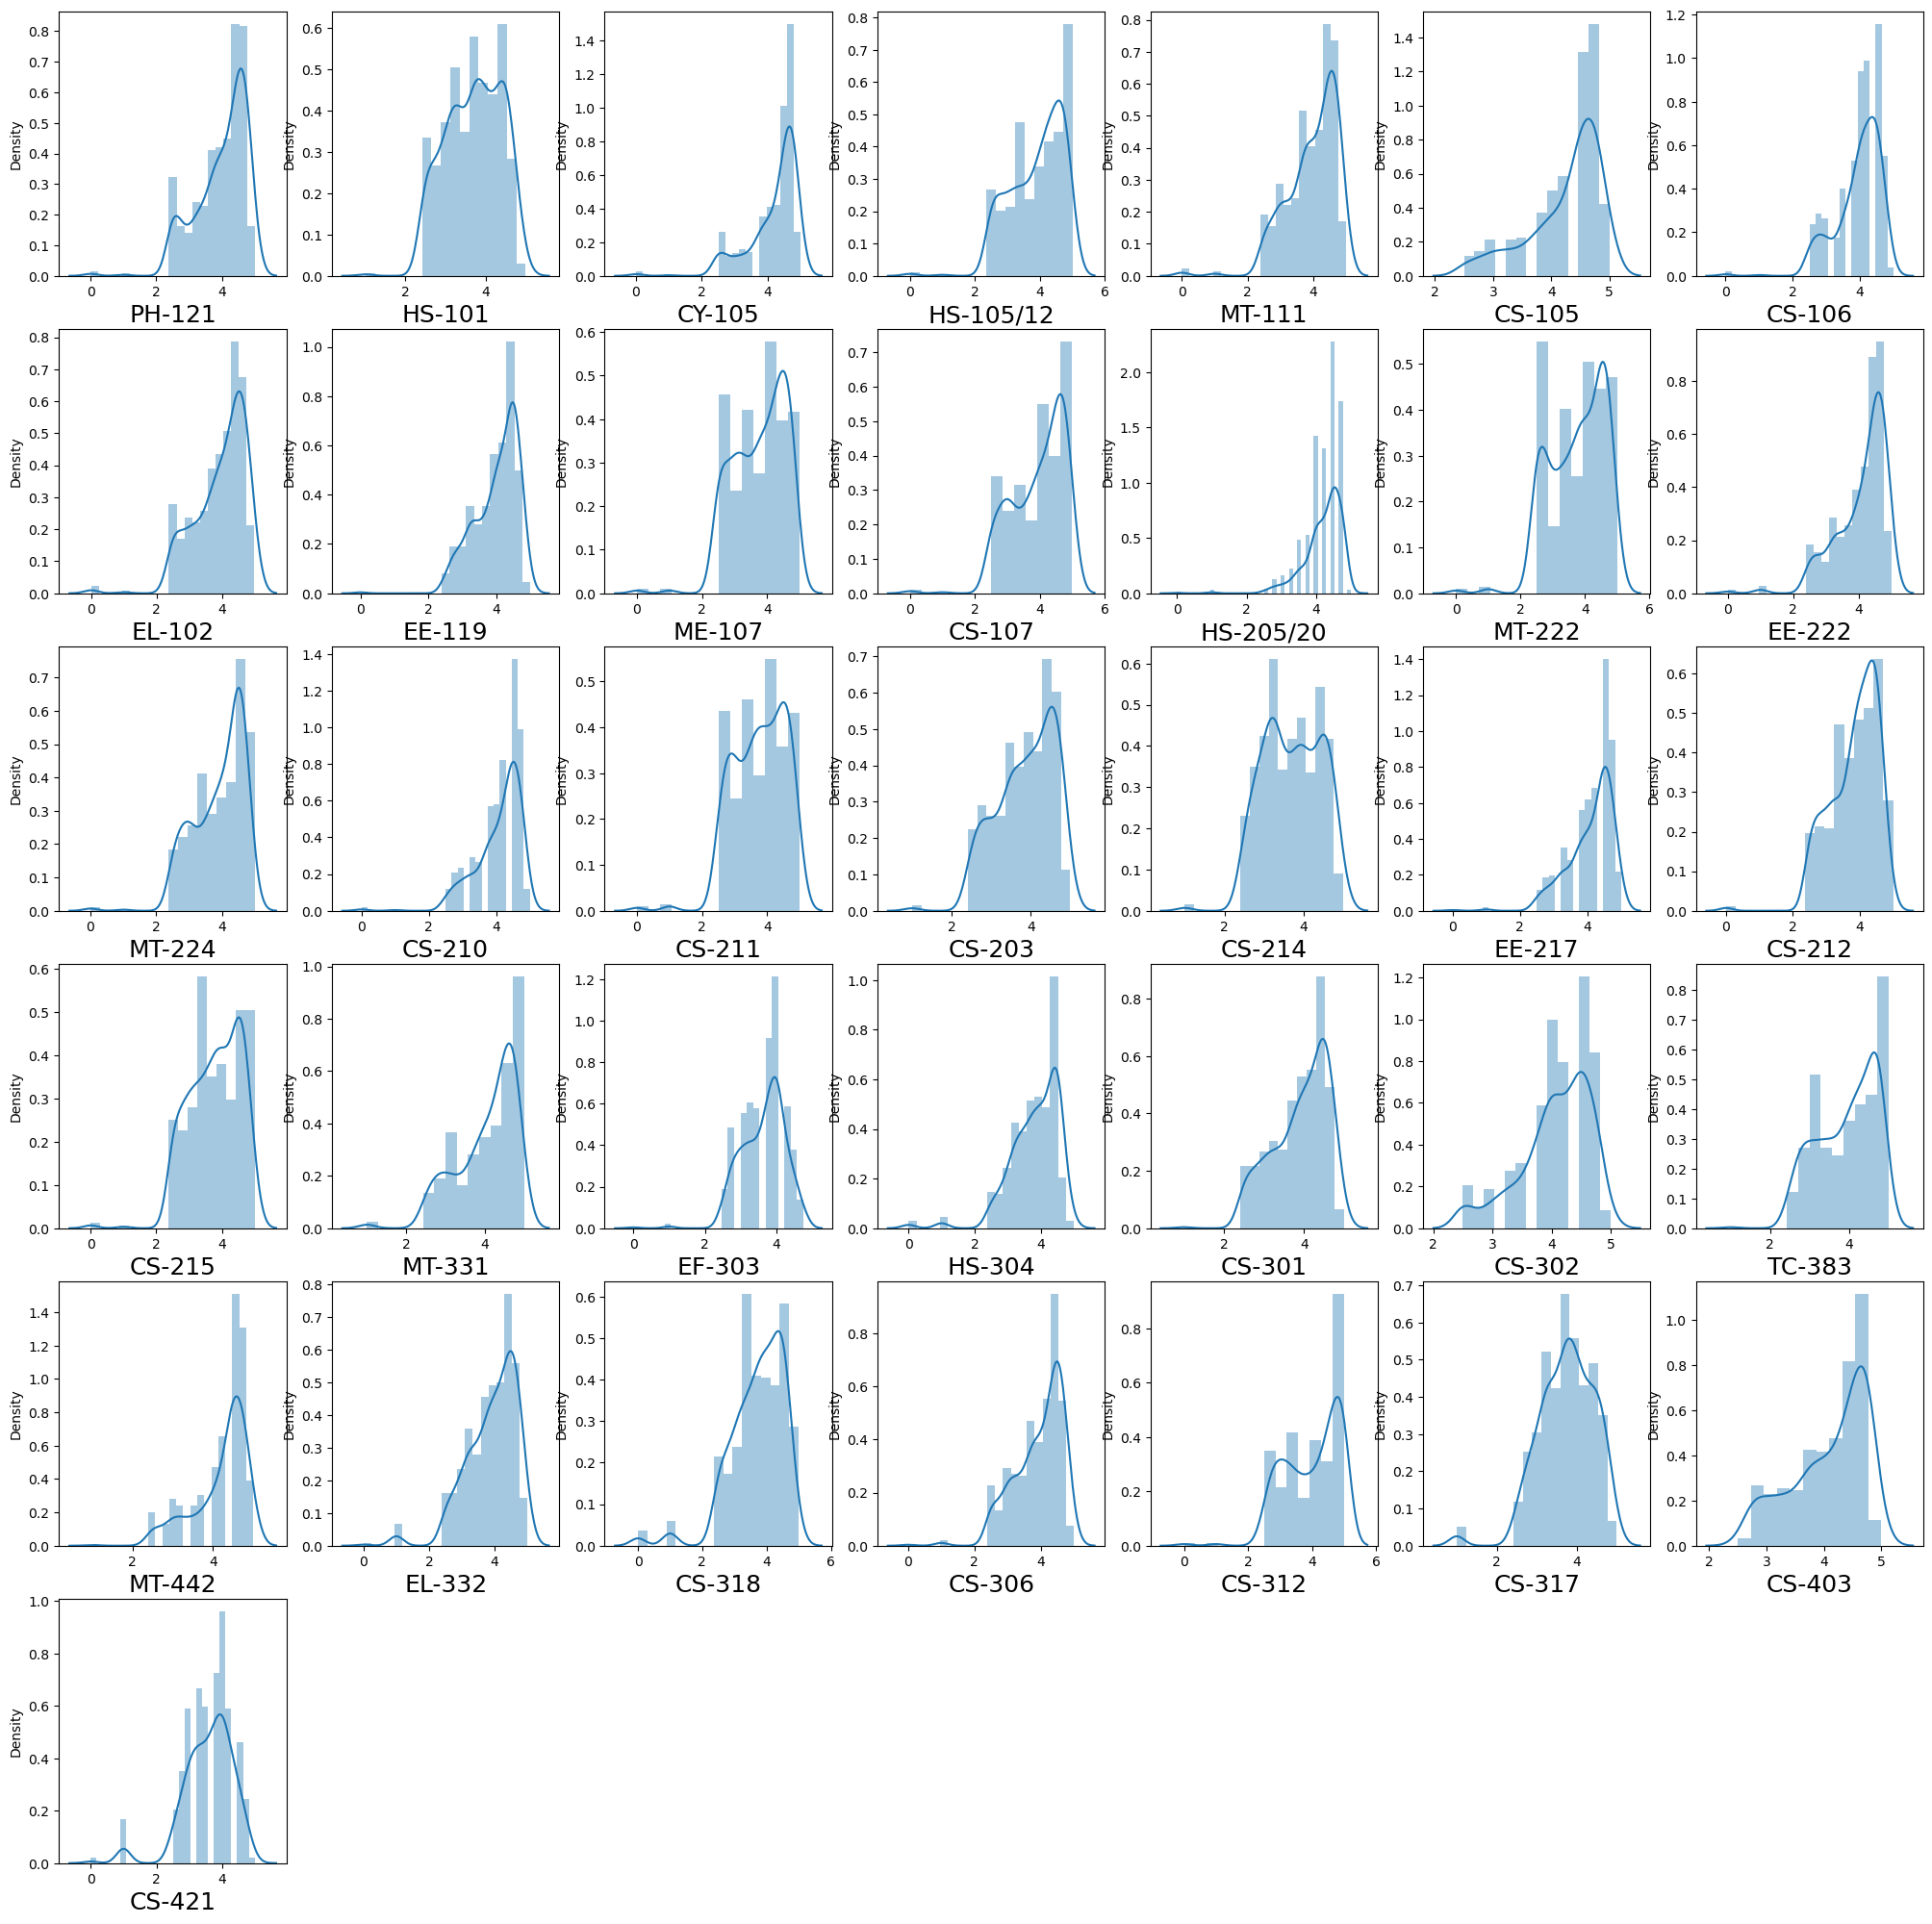

In [22]:
columns = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107',
       'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331',
       'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442',
       'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 38:
        ax = plt.subplot(6, 7, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()


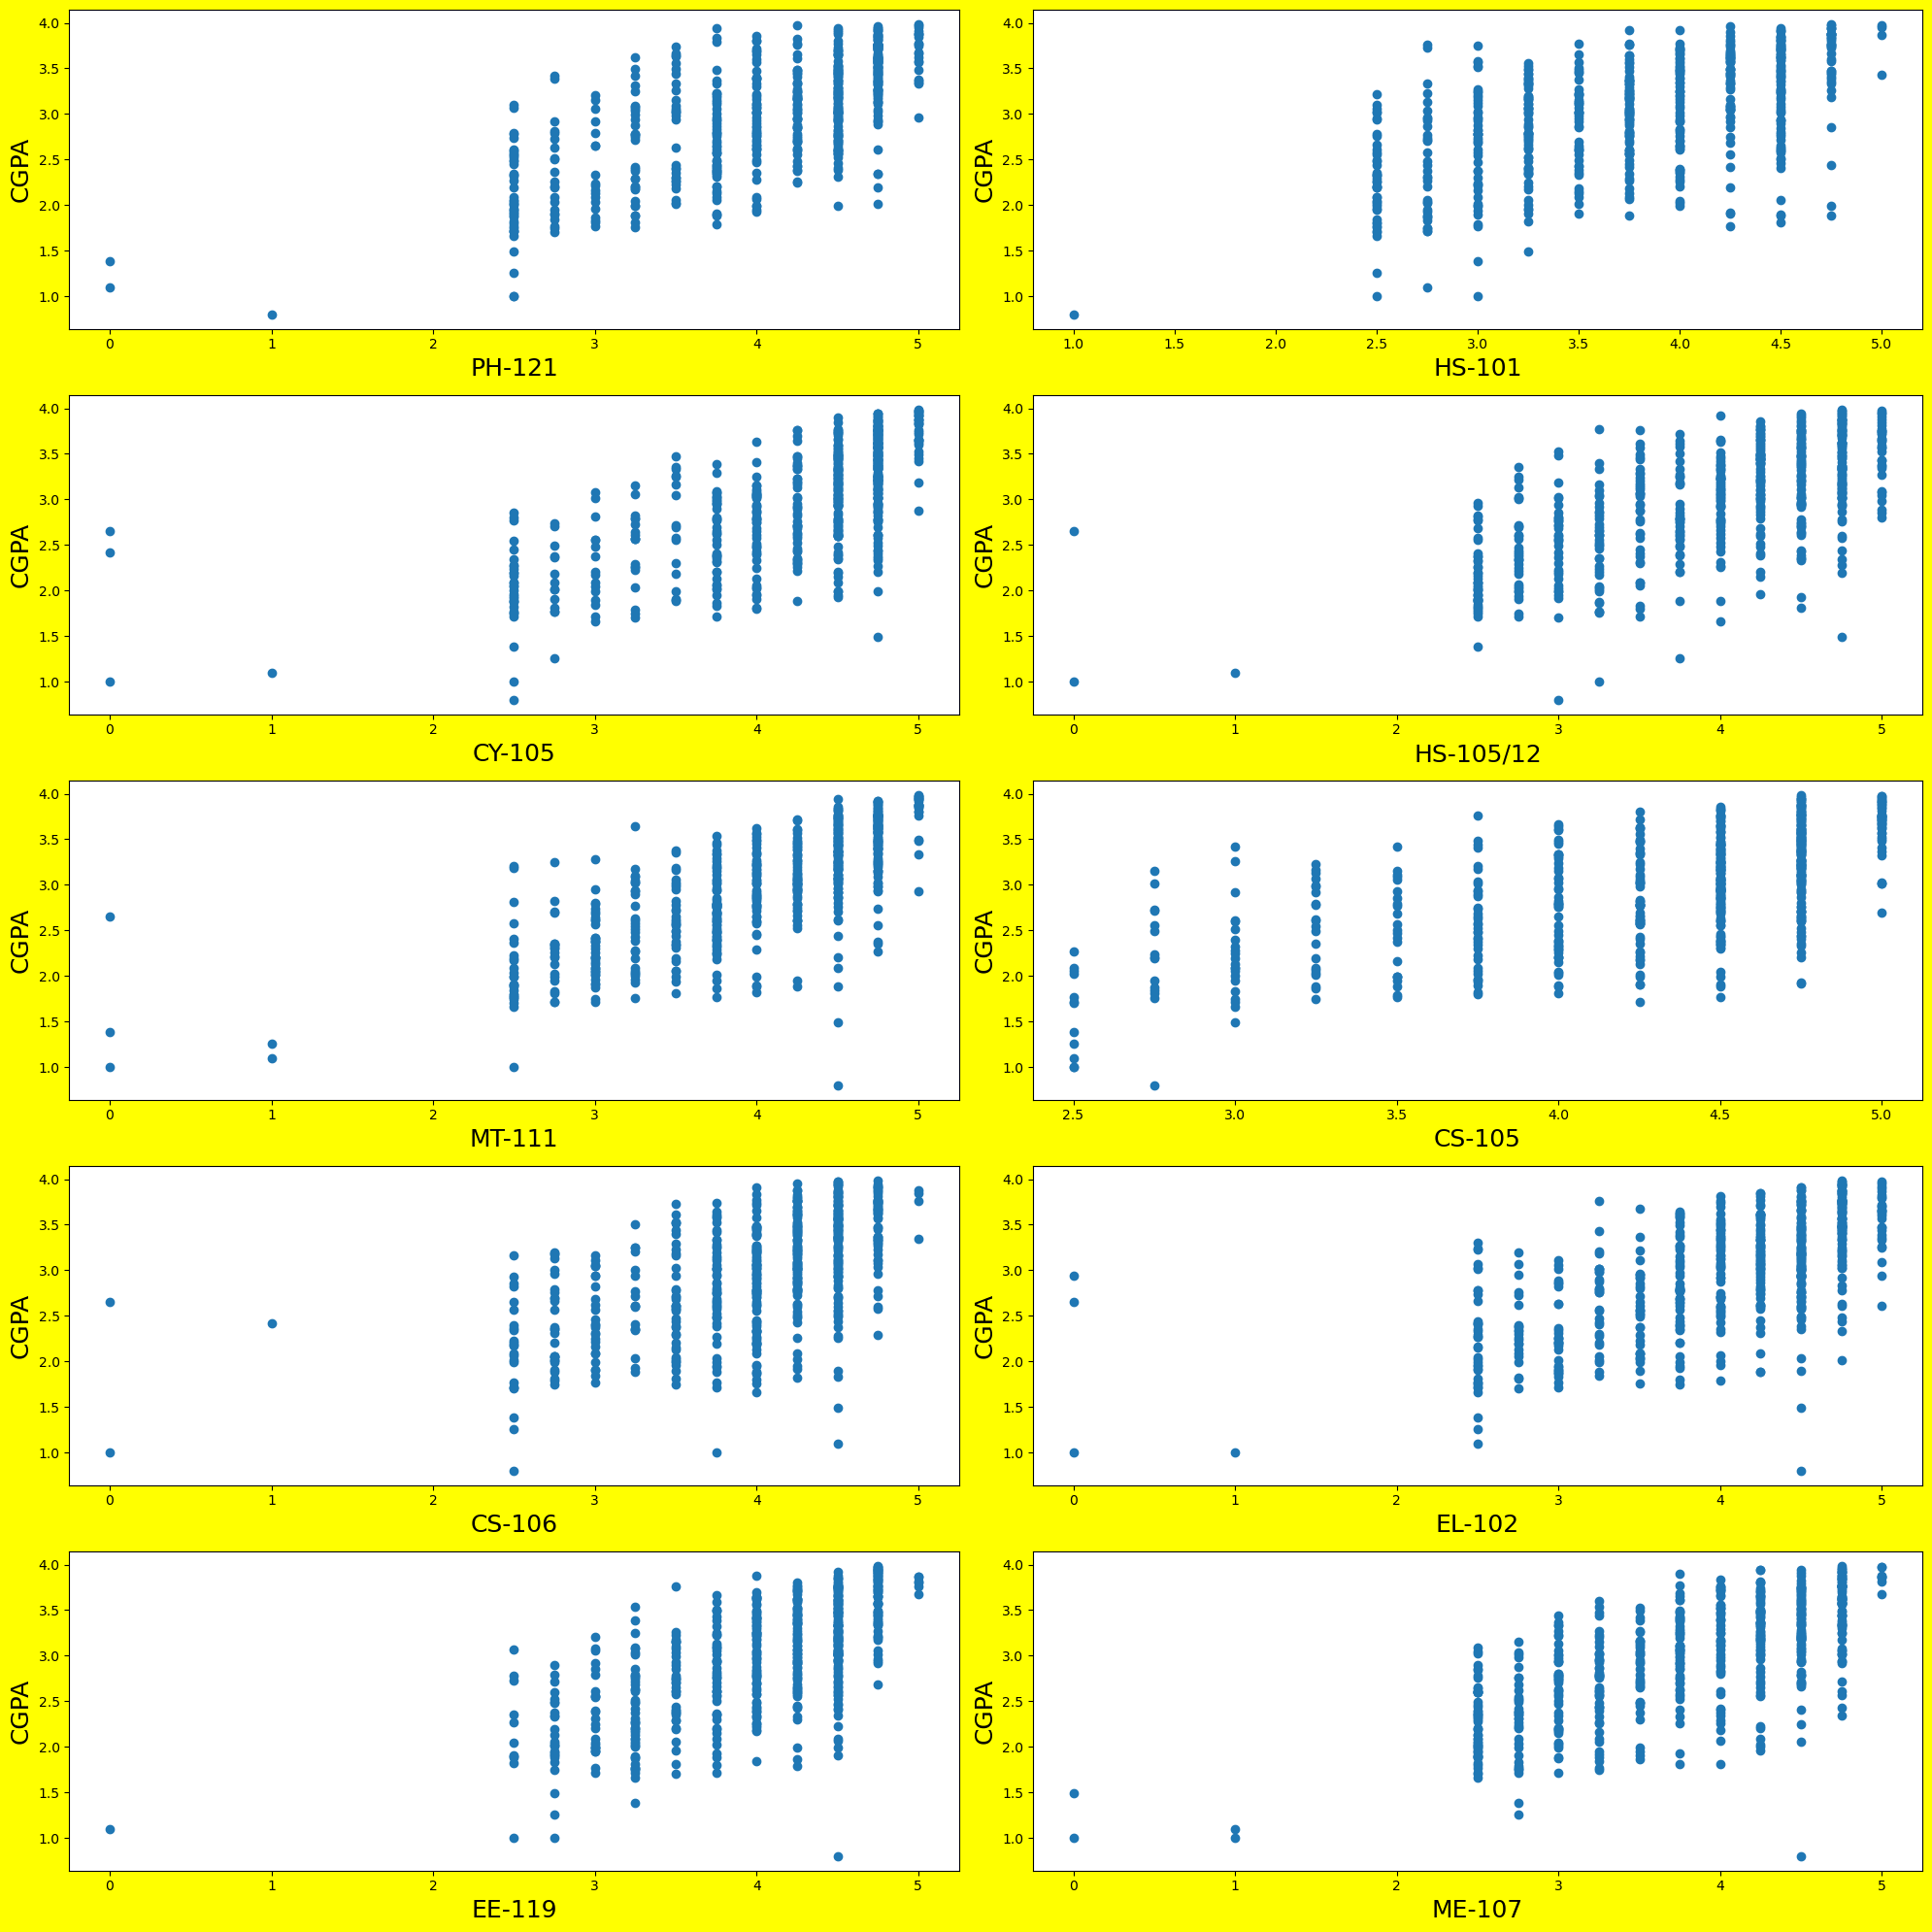

In [23]:
x = data[['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107',
       'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331',
       'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442',
       'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421']]
y= (data['CGPA'])
plt.figure(figsize=(20,20), facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber <=10:
        ax=plt.subplot(5,2,plotnumber)
        plt.scatter (x[column], y)
        plt.xlabel(column, fontsize=18)
        plt.ylabel ('CGPA', fontsize=18)
        plotnumber +=1
        plt.tight_layout()

In [25]:
from scipy.stats import zscore
out_features=data[['EE-119']]
z=np.abs(zscore(out_features))
z

,EE-119
0,0.396444
1,1.968457
2,0.782565
3,2.361460
4,1.175568
...,...
566,1.568571
567,1.175568
568,1.175568
569,0.396444


In [26]:
from scipy.stats import zscore
out_features=data[['ME-107']]
z=np.abs(zscore(out_features))
z

,ME-107
0,0.948618
1,1.574454
2,0.928889
3,0.322782
4,0.928889
...,...
566,0.615972
567,1.241807
568,0.303054
569,0.948618


In [27]:
from scipy.stats import zscore
out_features=data[['EL-102']]
z=np.abs(zscore(out_features))
z

,EL-102
0,1.237510
1,0.995595
2,0.357565
3,1.237510
4,0.357565
...,...
566,0.676580
567,0.676580
568,0.995595
569,1.237510


In [28]:
from scipy.stats import zscore
out_features=data[['HS-105/12']]
z=np.abs(zscore(out_features))
z

,HS-105/12
0,0.807712
1,1.735687
2,0.189062
3,1.735687
4,0.429588
...,...
566,0.738913
567,1.048238
568,0.429588
569,1.048238


In [29]:
np.where(z>3)

(array([137, 143, 281], dtype=int64), array([0, 0, 0], dtype=int64))

In [30]:
data1=data[(z<3).all(axis=1)]
data1.shape

(568, 37)

In [31]:
q1=out_features.quantile(0.25)
q3=out_features.quantile(0.75)
iqr=q3-q1
data2=data1[~((data1 <(q1 - 1.5 * iqr)) |(data1> (q3 + 1.5 * iqr))).any(axis=1)]

In [33]:
data2.shape

(568, 37)

In [34]:
data=data2

In [54]:
x=data.drop (columns=['CGPA', 'CS-107', 'CS-203', 'CS-214'], axis=1)
y=data['CGPA']

In [49]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data)
x_scaled

array([[-0.34531215, -1.39129491, -1.72396883, ..., -1.67732656,
        -0.75499886, -1.23906844],
       [ 0.9866899 , -1.75580391, -2.07991732, ..., -1.29547426,
        -1.40132794, -1.56146087],
       [ 0.9866899 ,  0.43125008,  0.7676706 , ...,  0.99563953,
        -0.43183431,  1.05695486],
       ...,
       [-0.01231164,  1.52477708,  0.41172211, ...,  0.99563953,
         0.86082386,  0.8311165 ],
       [ 0.9866899 ,  0.79575908, -2.43586581, ..., -0.14991736,
        -0.75499886, -1.25870656],
       [-1.01131318, -1.75580391, -2.43586581, ..., -0.53176966,
        -1.40132794, -1.97877088]])

In [50]:
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 4)

In [58]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.95783677 0.95987966 0.84059689 0.96693986 0.88674277]
0.9223991923180496


In [61]:
from sklearn.svm import SVR
SVR = SVR()
cv = cross_val_score(SVR,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.96905896 0.95899116 0.8488336  0.94877216 0.93668995]
0.9324691662400142


In [66]:
from sklearn.svm import SVR
svr = SVR()

svr.fit(x_train, y_train)

pred_train = svr.predict(x_train)
pred_test = svr.predict(x_test)

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print("R-squared Train:", r2_train)
print("R-squared Test:", r2_test)


R-squared Train: 0.9829940478446363
R-squared Test: 0.9275722250521858


In [68]:
print('Mean absolute error:',mean_absolute_error(y_test, pred_test) )
print('Mean squared error:',mean_squared_error(y_test, pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred_test)))

Mean absolute error: 0.09658513590294025
Mean squared error: 0.02657708389432899
Root mean squared error: 0.16302479533595185


In [69]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
regression2 = LinearRegression()


In [70]:
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regression2.fit(x_train, y_train)
    y_pred = regression2.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    
    mse_scores.append(mse)

average_mse = np.mean(mse_scores)
print("Mean Squared Error per fold:", mse_scores)
print("Average Mean Squared Error:", average_mse)


Mean Squared Error per fold: [0.009645218712818775, 0.009424133155997248, 0.011407538314137804, 0.044453714897856565, 0.05452934037550545]
Average Mean Squared Error: 0.025891989091263168


In [72]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)

,Actual,Predict
1,2.008,1.972490
8,3.358,3.305100
13,3.523,3.542328
14,3.443,3.495205
20,2.246,2.297803
...,...,...
554,2.880,2.877633
556,3.624,3.530726
562,2.821,2.857439
565,0.800,3.118597
